In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
from mcmc import no

Matplotlib is building the font cache; this may take a moment.
/home/alisyaifudin/anaconda3/envs/maturin/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use('seaborn-v0_8-bright')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

# All out

In [4]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
log_nu0 = [5.]
R = [3.4E-3]
zsun = [30]
w0 = [-7.]
sigmaw = [5.]
a = [8.]

theta = np.array([rhob + sigmaz + log_nu0 + R + zsun + w0 + sigmaw + log_nu0]).flatten()

z_start = 0
z_end = 200

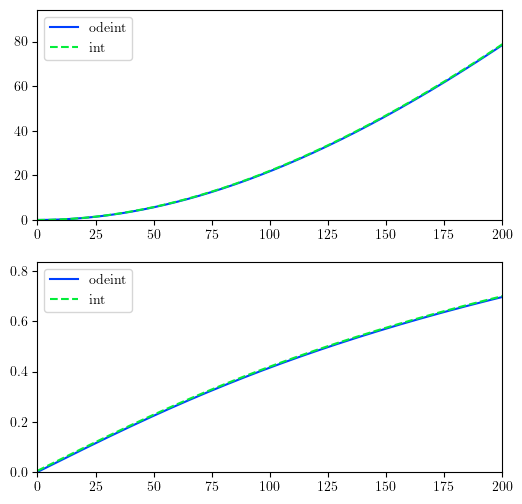

In [6]:
dz = 1
z, phi, Kz = no.solve_potential(theta, z_start, z_end, dz)
u = np.array([phi, Kz])
dphi, dKz = no.f(z, u, theta)
phi_int = np.cumsum(dphi)*dz
Kz_int = np.cumsum(dKz)*dz
# subplot
fig, ax = plt.subplots(2, 1, figsize=(6, 6))
ax[0].plot(z, phi, label=r"odeint")
ax[0].plot(z, phi_int, label=r"int", ls="--")
# ax[0].set_xlabel(r"$z$ (pc)")
# ax[0].set_ylabel(r"$\phi$ (km/s)$^2$")
ax[0].set_xlim(0, z[-1])
ax[0].set_ylim(0, phi[-1]*1.2)
ax[0].legend()
ax[1].plot(z, Kz, label=r"odeint")
ax[1].plot(z, Kz_int, label=r"int", ls="--")
# ax[1].set_xlabel(r"$z$ (pc)")
# ax[1].set_ylabel(r"$K_z$ [pc (km/s)$^2$]")
ax[1].set_xlim(0, z[-1])
ax[1].set_ylim(0, Kz[-1]*1.2)
ax[1].legend()
# plt.tight_layout()
plt.show()

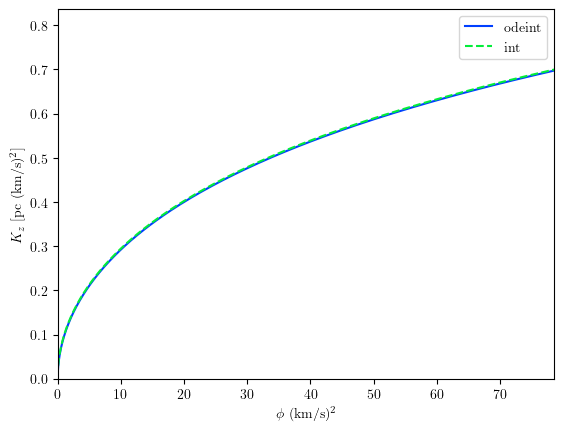

In [7]:
plt.plot(u[0], u[1], label=r"odeint")
plt.plot(phi_int, Kz_int, label=r"int", ls="--")
plt.xlabel(r"$\phi$ (km/s)$^2$")
plt.ylabel(r"$K_z$ [pc (km/s)$^2$]")
plt.xlim(0, u[0][-1])
plt.ylim(0, u[1][-1]*1.2)
plt.legend()
plt.show()

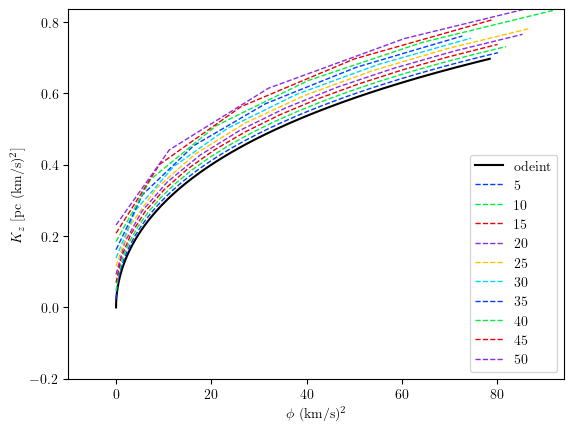

In [8]:
z, phi, Kz = no.solve_potential(theta, z_start, z_end, 1)
plt.plot(phi, Kz, label=r"odeint", c='k')
for dz in range(5, 51, 5):
    z, phi, Kz = no.solve_potential(theta, z_start, z_end, dz)
    u = np.array([phi, Kz])
    dphi, dKz = no.f(z, u, theta)
    phi_int = np.cumsum(dphi)*dz
    Kz_int = np.cumsum(dKz)*dz
    plt.plot(phi_int, Kz_int, label=dz, ls="--", lw=1)
plt.xlabel(r"$\phi$ (km/s)$^2$")
plt.ylabel(r"$K_z$ [pc (km/s)$^2$]")
plt.xlim(-10, u[0][-1]*1.2)
plt.ylim(-0.2, u[1][-1]*1.2)
plt.legend()
plt.show()